# Notebook_eda_jonathan

## Introduction

### Instructions

Vous êtes développeur dans une entreprise qui travaille dans le domaine de la FinTech. Votre client est une société d'investissement qui souhaite détecter les faillites d'entreprises, ce qui leur permet de mieux comprendre et gérer les risques.

Votre objectif est de créer un modèle de machine learning pour détecter la probabilité de faire faillite en utilisant les decision trees et les méthodes ensemblistes (bagging, boosting and stacking).

Pour cela, vous disposez d'un dataset avec 95 features (X1-X95) et un target. Les features représentent des indicateurs définis par les réglementations commerciaux de la Bourse. Votre target est appelé "Bankrupt ?", qui a la valeur 0 si l'entreprise n'a pas fait faillite, et la valeur 1 si l'entreprise a fait faillite.

### Deliverables

- créer un repo git et un espace sur github/gitlab pour le projet
- présenter un planning de travail
- faire une EDA des données (notebook_EDA)
- analyser et nettoyer cette base de données (procédure expliqué dans le notebook EDA)
- présenter la procédure suivi pour trouver un modèle adapté (notebook_model)
- sélectionner les données (features) pertinents pour le modèle (dans le notebook model)
- créer un modèle d'IA entraîné et adapté au problème (format pickle)
- proposer un protocole d'utilisation du modèle pour faire des prédictions
- faire une présentation qui explique votre démarche et les résultats obtenus. Vous devez expliquer (10 slides maximum)

## Data/Libraries import

In [1]:
# Libraries import
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data import
df = pd.read_csv('data/data.csv')

In [3]:
# Creating copy of the dataset
raw_df = df.copy()

## EDA

### Basic data exploration

In [4]:
raw_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
# Renaming every columns except target (need to remove the space before the first letter)
raw_df.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in raw_df.columns]

In [6]:
# Shape of the df
raw_df.shape

(6819, 96)

In [7]:
# info
raw_df.info()

## 96 columns / Target = Bankrupt (int) / 95 features (mostly float, else int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [8]:
pd.options.display.max_columns = None
raw_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [9]:
# Check for missing values

# Create dataframe for nan sum and percent
df_nan = pd.DataFrame({'Nan':raw_df.isna().sum()})
df_nan['%nan'] = df_nan['Nan']/raw_df.shape[0]*100
round(df_nan,2).sort_values(by='%nan' , ascending=False)

# Display value of each column
df_nan['Nan'].values

## There is no missing data in this dataframe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
# Check for duplicates data

# df_duplicated = pd.DataFrame({'Duplicates':raw_df.duplicated().sum()})
# df_duplicated['%duplicates'] = df_nan['Duplicates']/raw_df.shape[0]*100
# round(df_duplicated,2).sort_values(by='%duplicates' , ascending=False)
raw_df.duplicated().sum()

## There is no duplicated row in this dataset

0

After these first steps, we can see that this dataset has neither missing values, nor duplicated rows. It contains 6819 rows and 96 columns (1 target (Bankrupt) and 95 features (mostly float features).

### Univariate analysis

#### Target feature

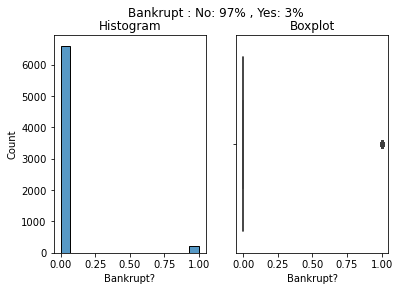

In [11]:
# Target distribution / Boxplot

# Define figure size
fig, axes = plt.subplots(1, 2)

# Plot hist and box graph / Set titles
sns.histplot(x = 'Bankrupt?', data = raw_df, ax = axes[0])
sns.boxplot(x = 'Bankrupt?', data = raw_df, ax = axes[1])
axes[0].set_title("Histogram")
axes[1].set_title("Boxplot")

# Store label % and use it for suptitle
target_ratio = raw_df['Bankrupt?'].value_counts(normalize=True) * 100
plt.suptitle(f"Bankrupt : No: {round(target_ratio[0])}% , Yes: {round(target_ratio[1])}%")

# Display the figure
plt.show()

## really unbalanced class, 97% of 0 (No bankrupt) and 3% of 1 (Bankrupt)

#### Categorical features

In [14]:
# Creating categorical features df
categorical_features = raw_df.select_dtypes(exclude=[float])

# Store value_counts for each feature
liability_assets = categorical_features.loc[:, "Liability-Assets Flag"].value_counts()
net_income_flag = categorical_features.loc[:, "Net Income Flag"].value_counts()

print(liability_assets)
print(net_income_flag)

## Liability_assets is almost full of 0 (False)
## Net_income_flag is full of 1 (True)

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64
1    6819
Name: Net Income Flag, dtype: int64


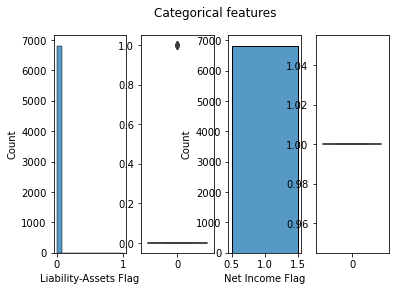

In [15]:
# Define figure size
fig2, axes2 = plt.subplots(1, 4)

# Plot hist and box graph / Set titles
sns.histplot(data = categorical_features["Liability-Assets Flag"], ax = axes2[0])
sns.boxplot(data = categorical_features["Liability-Assets Flag"], ax = axes2[1])
sns.histplot(data = categorical_features["Net Income Flag"], ax = axes2[2])
sns.boxplot(data = categorical_features["Net Income Flag"], ax = axes2[3])
axes[0].set_title("Histogram")
axes[1].set_title("Boxplot")

# Store label % and use it for suptitle

plt.suptitle("Categorical features")

# Display the figure
plt.show()

#### Distribution

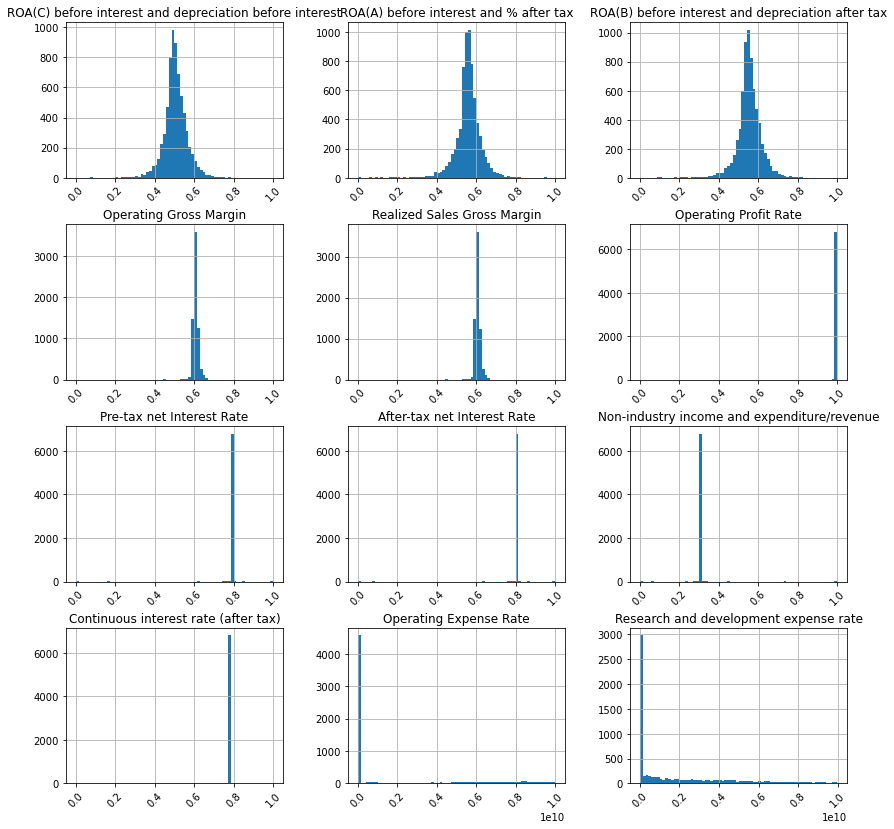

In [30]:
raw_df.iloc[:, 1:13].hist(figsize=(14,14), xrot=45, bins=70)
plt.show()

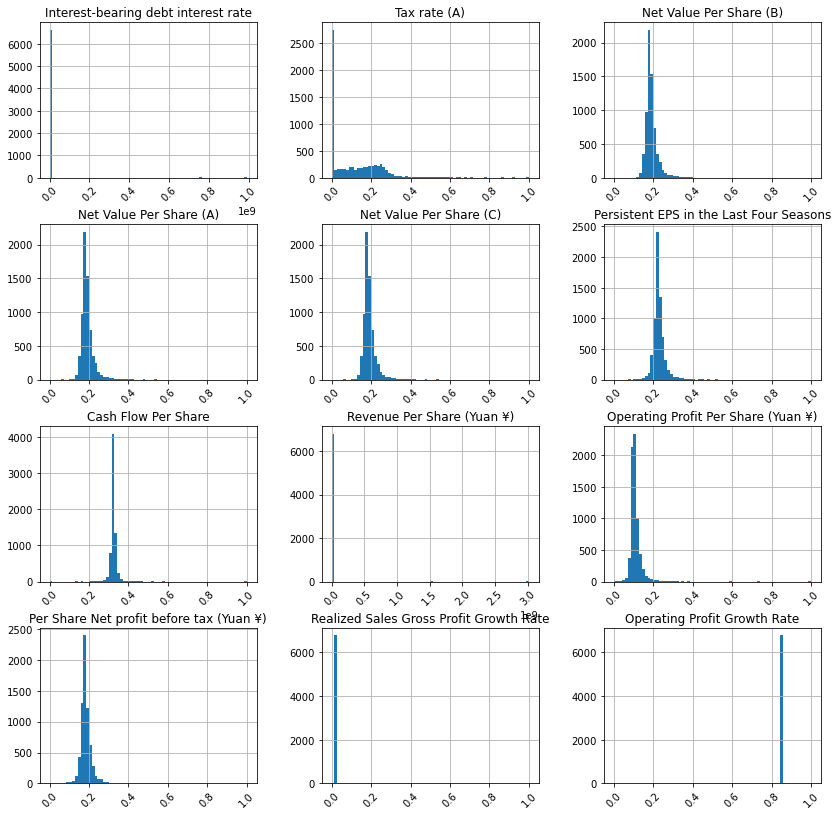

In [19]:
raw_df.iloc[:, 14:26].hist(figsize=(14,14), xrot=45, bins=70)
plt.show()

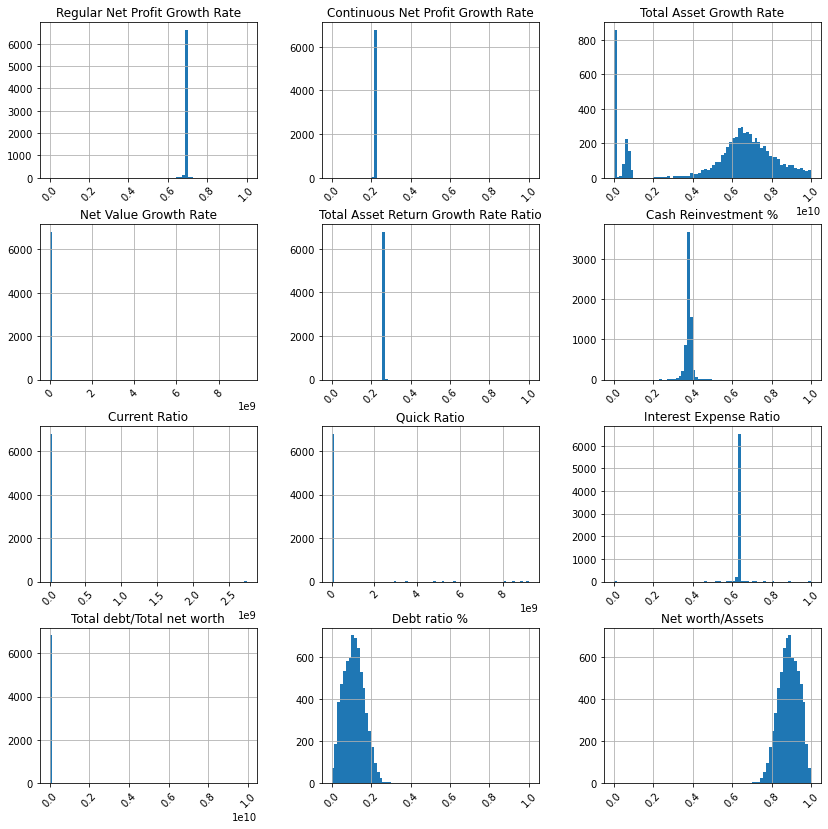

In [20]:
raw_df.iloc[:, 27:39].hist(figsize=(14,14), xrot=45, bins=70)
plt.show()

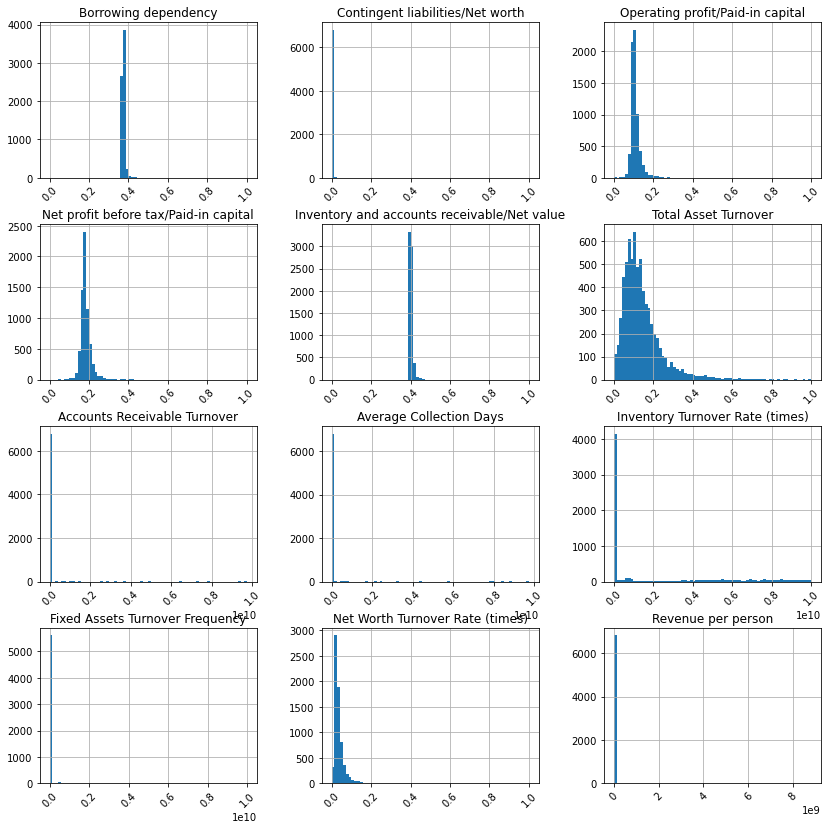

In [31]:
raw_df.iloc[:, 40:52].hist(figsize=(14,14), xrot=45, bins=70)
plt.show()

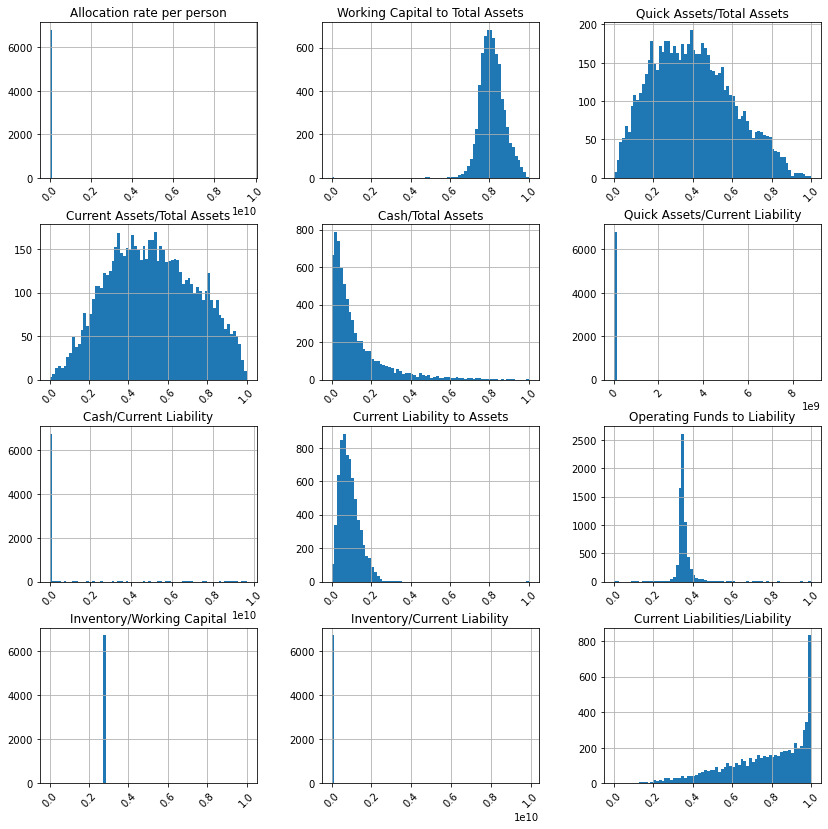

In [32]:
raw_df.iloc[:, 53:65].hist(figsize=(14,14), xrot=45, bins=70)
plt.show()

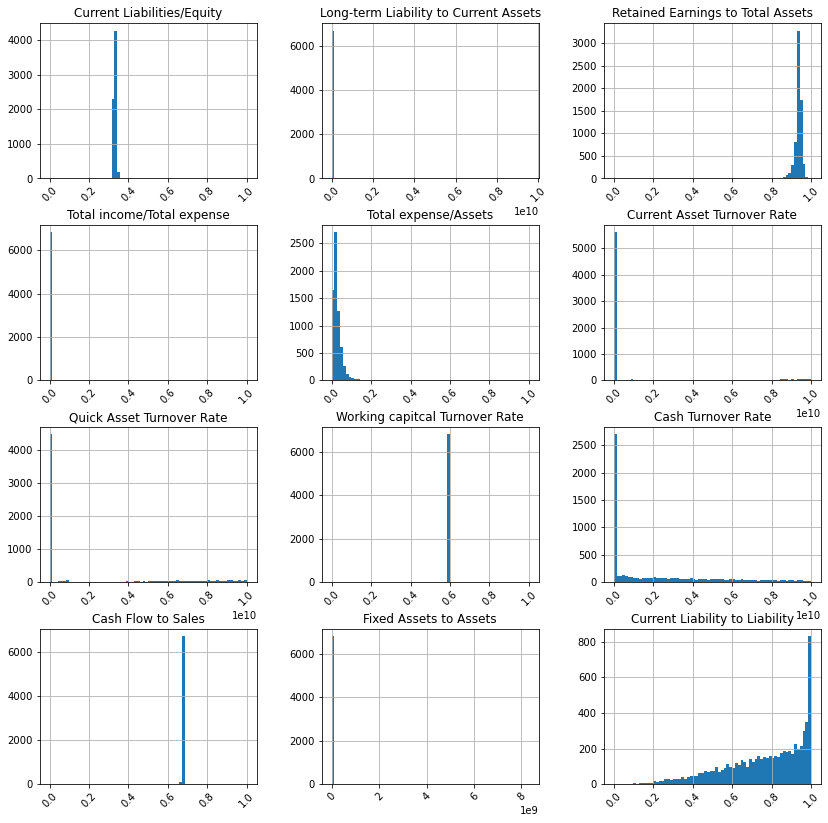

In [33]:
raw_df.iloc[:, 66:78].hist(figsize=(14,14), xrot=45, bins=70)
plt.show()

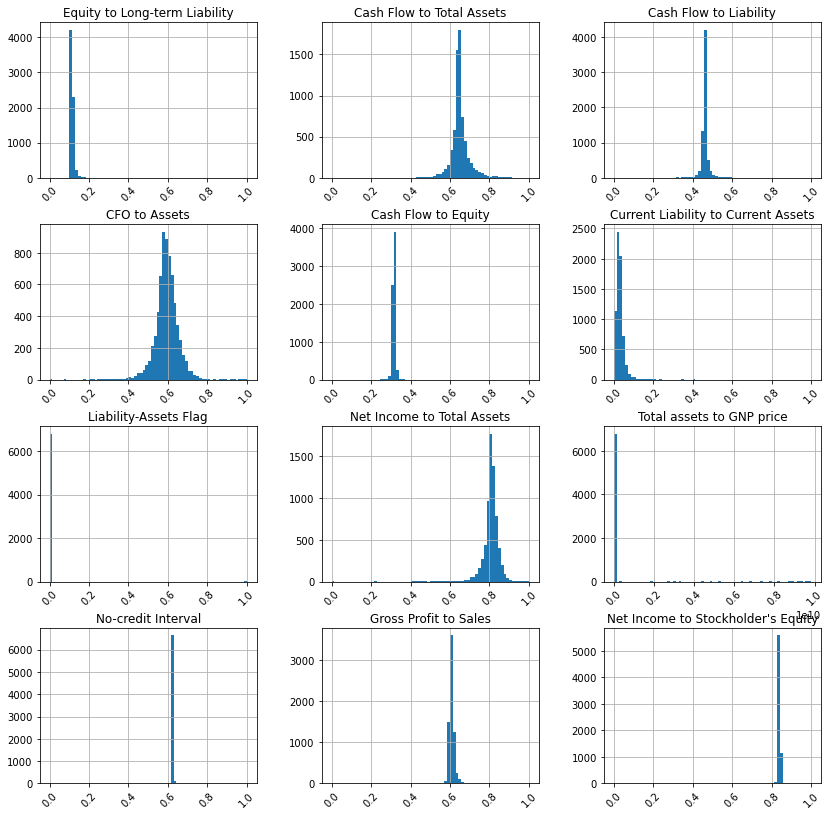

In [34]:
raw_df.iloc[:, 79:91].hist(figsize=(14,14), xrot=45, bins=70)
plt.show()

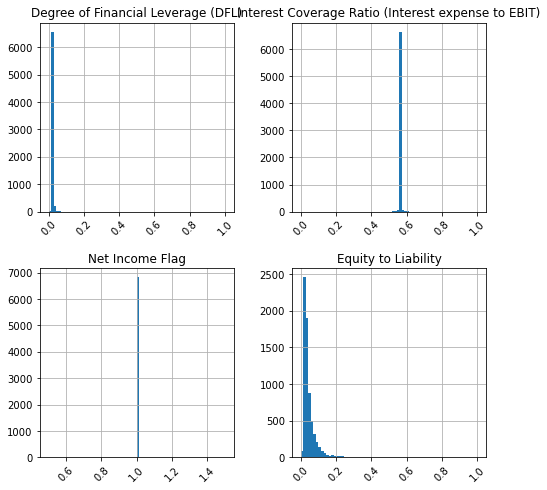

In [35]:
raw_df.iloc[:, 92:].hist(figsize=(8,8), xrot=45, bins=70)
plt.show()

#### Outliers

In [98]:
# Splitting between column with max value <= 1 and max value > 1

# Create 2 lists to store columns name/values
max_1 = []
max_above_1 = []

#Looping through the dataset, populating lists above
for column in raw_df:
    if raw_df[column].max() <= 1:
        max_1.append(raw_df[column])
    else:
        max_above_1.append(raw_df[column])
    

max_1_df = pd.DataFrame(max_1).T
above_1_df = pd.DataFrame(max_above_1).T

In [103]:
# max_1_df.head()

##### Above 1 outliers

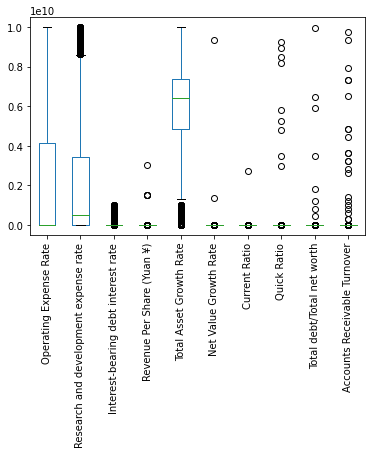

In [119]:
above_1_df.iloc[:, 0:10].plot.box(rot=90)
plt.show()

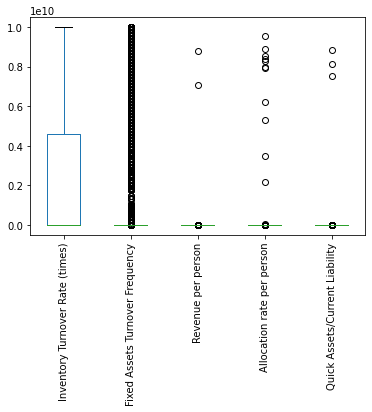

In [122]:
above_1_df.iloc[:, 11:16].plot.box(rot=90)
plt.show()

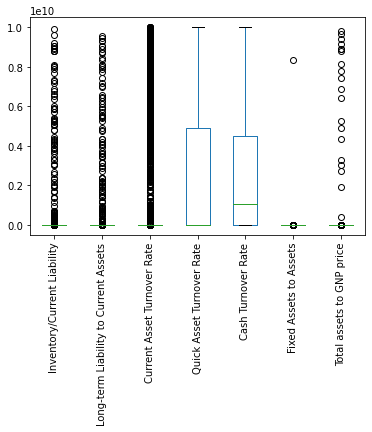

In [123]:
above_1_df.iloc[:, 17:].plot.box(rot=90)
plt.show()

##### Max 1 outliers

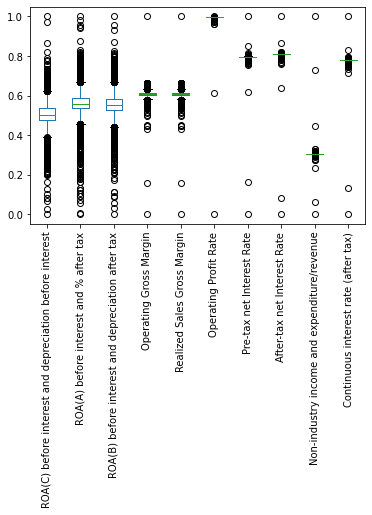

In [126]:
max_1_df.iloc[:, 1:11].plot.box(rot=90)
plt.show()

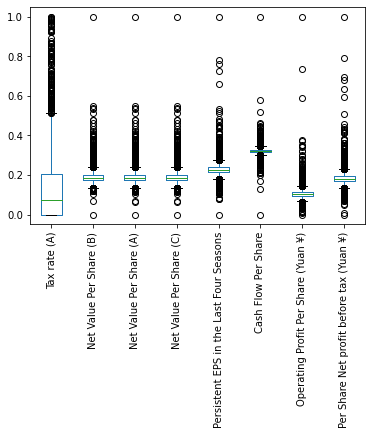

In [127]:
max_1_df.iloc[:, 12:20].plot.box(rot=90)
plt.show()

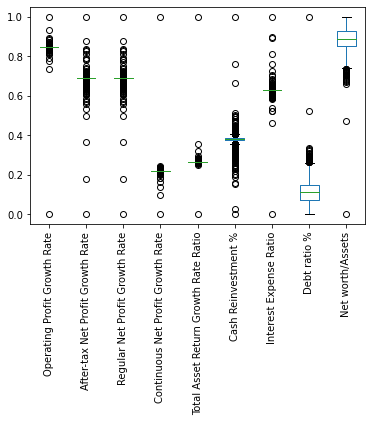

In [128]:
max_1_df.iloc[:, 21:30].plot.box(rot=90)
plt.show()

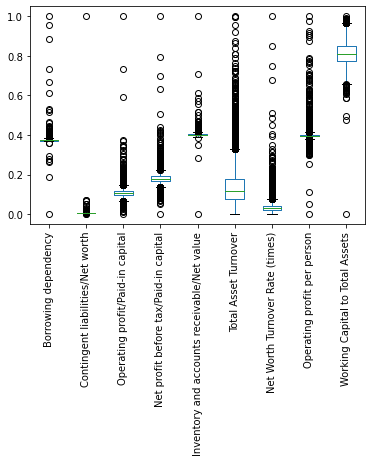

In [129]:
max_1_df.iloc[:, 31:40].plot.box(rot=90)
plt.show()

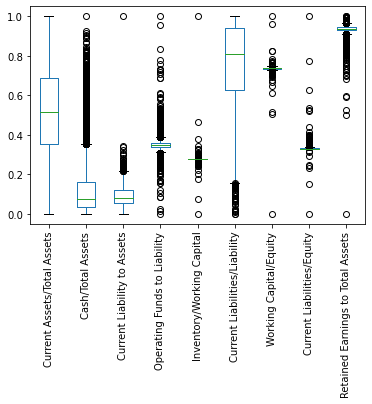

In [130]:
max_1_df.iloc[:, 41:50].plot.box(rot=90)
plt.show()

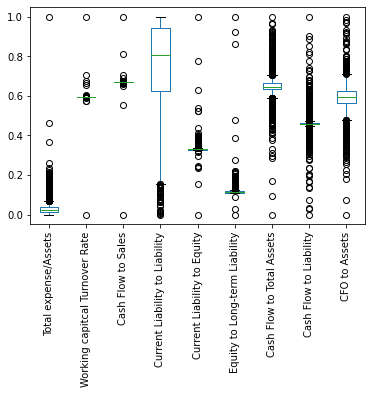

In [131]:
max_1_df.iloc[:, 51:60].plot.box(rot=90)
plt.show()

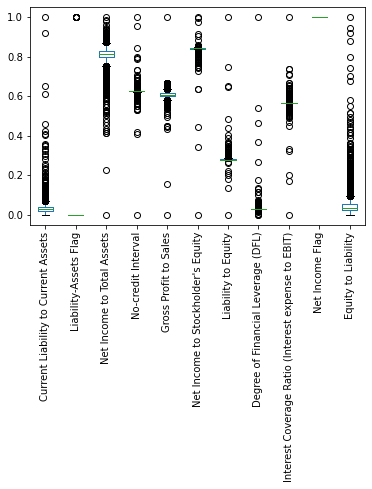

In [132]:
max_1_df.iloc[:, 61:].plot.box(rot=90)
plt.show()

### Multivariate analysis

In [36]:
matrix_corr = raw_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
matrix_corr

C:\Users\SImplon.co\anaconda3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\SImplon.co\anaconda3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
